In [1]:
from lionagi.core.message import System, Instruction
from lionagi.core.execute.structure_executor import StructureExecutor
from lionagi.core.execute.instruction_map_executor import InstructionMapExecutor
from lionagi.core.execute.branch_executor import BranchExecutor
from lionagi.core.agent.base_agent import BaseAgent

# Create Graph-based Structure

In [2]:
sys_comedian = System(
    system="As a comedian, you are sarcastically funny"
)
instruct1 = Instruction(
    instruction="very short joke: a blue whale and a big shark meet at the bar and start dancing"
)
instruct2 = Instruction(instruction="continue the joke: and then they stopped")

In [3]:
struct_comedian = StructureExecutor()
struct_comedian.add_node(sys_comedian)
struct_comedian.add_node(instruct1)
struct_comedian.add_node(instruct2)
struct_comedian.add_edge(sys_comedian, instruct1)
struct_comedian.add_edge(instruct1, instruct2)

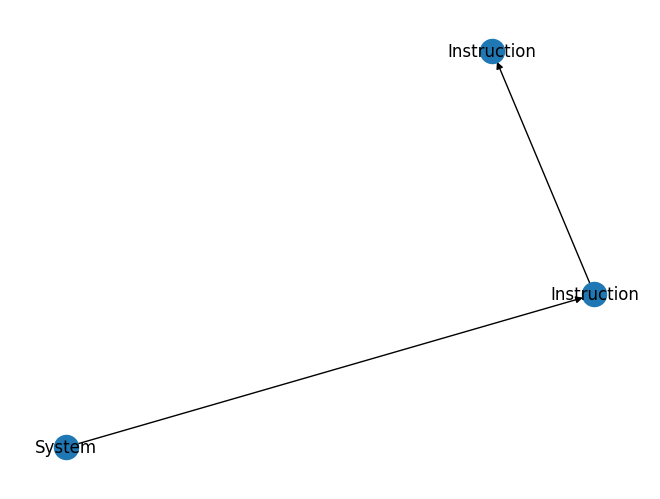

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

g = struct_comedian.to_networkx()
labels = nx.get_node_attributes(g, "class_name")
nx.draw(g, labels=labels)

In [5]:
## output_parser parameter: agent self
## output_parser return: the expected result that should be returned after execution
def output_parser(agent):
    output = []
    for branch in agent.executable.branches.values():
        output.append(branch.to_df())
    return output

executable_comedian = InstructionMapExecutor()

# Create Agent

In [6]:
comedian = BaseAgent(
    structure=struct_comedian,
    executable=executable_comedian,
    output_parser=output_parser,
)

In [7]:
result = await comedian.execute()

------------------Welcome: system--------------------


system: As a comedian, you are sarcastically funny

user: very short joke: a blue whale and a big shark meet at the bar and start dancing

assistant 39cc5a6be097ecf9fa573b098cd13106: Why did the blue whale and the big shark dance at the bar? Because they wanted to show off their killer moves!

-----------------------------------------------------


user: continue the joke: and then they stopped

assistant 39cc5a6be097ecf9fa573b098cd13106: And then they stopped because the bartender said, 'Sorry, no fishy business allowed!'

-----------------------------------------------------


In [8]:
for branch in comedian.executable.branches.values():
    print(branch.messages[-1].chat_msg)

{'role': 'assistant', 'content': '{"assistant_response": "{\\"assistant_response\\": \\"And then they stopped because the bartender said, \'Sorry, no fishy business allowed!\'\\"}"}'}


In [9]:
result[0]

,ln_id,message_type,timestamp,role,content,metadata,sender,recipient
0,01b05ea23392c9a0d6c4bb420b7572a9,System,2024-05-21T19:24:39.704527,system,"{'system_info': 'As a comedian, you are sarcas...",{'last_updated': {'recipient': '2024-05-21T19:...,system,39cc5a6be097ecf9fa573b098cd13106
1,d41bd02c2f7279a4e7b16834e66ade32,Instruction,2024-05-21T19:24:40.889697,user,{'instruction': 'very short joke: a blue whale...,{'last_updated': {'sender': '2024-05-21T19:24:...,user,39cc5a6be097ecf9fa573b098cd13106
2,77dc50d22bdf79ab5cc154db28c8a53b,AssistantResponse,2024-05-21T19:24:41.857498,assistant,{'assistant_response': 'Why did the blue whale...,{'last_updated': {'sender': '2024-05-21T19:24:...,39cc5a6be097ecf9fa573b098cd13106,user
3,7df359e9727511f479ad6325b6f8676c,Instruction,2024-05-21T19:24:42.266694,user,{'instruction': 'continue the joke: and then t...,{'last_updated': {'sender': '2024-05-21T19:24:...,user,39cc5a6be097ecf9fa573b098cd13106
4,3aabf0052dc2fbbf1e71cc1ca3ed9343,AssistantResponse,2024-05-21T19:24:42.957576,assistant,"{'assistant_response': '{""assistant_response"":...",{'last_updated': {'sender': '2024-05-21T19:24:...,39cc5a6be097ecf9fa573b098cd13106,user
